In [147]:
import pandas as pd

In [148]:
df = pd.read_csv('rides_data.csv')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1166 non-null   int64  
 1   is_delivery         1166 non-null   bool   
 2   latest_ride_status  1166 non-null   int64  
 3   title               1166 non-null   object 
 4   human_readable_id   1166 non-null   object 
 5   origin_lat          1166 non-null   float64
 6   origin_lng          1166 non-null   float64
 7   destination_lat     1166 non-null   float64
 8   destination_lng     1166 non-null   float64
 9   service_type        1166 non-null   object 
 10  type                1166 non-null   int64  
 11  created_at          1166 non-null   object 
 12  updated_at          1166 non-null   object 
 13  driver_name         1166 non-null   object 
 14  vehicle_model       1166 non-null   object 
 15  is_for_friend       1166 non-null   bool   
 16  final_

In [150]:
df.head()

,index,is_delivery,latest_ride_status,title,human_readable_id,origin_lat,origin_lng,destination_lat,destination_lng,service_type,type,created_at,updated_at,driver_name,vehicle_model,is_for_friend,final_price
0,0,True,5,سفر شنبه شب,SNP-241123-94650-1158,34.613996,50.879744,34.622057,50.875482,اسنپ باکس,5,2024-11-23 21:20:25,2024-11-23 21:36:36,علی ابراهیم بیگی,Bike,False,220000
1,1,False,5,سفر جمعه ظهر ۲۵ آبان,SNP-241115-04136-5490,34.674009,50.890099,34.613809,50.879508,اسنپ,1,2024-11-15 13:41:34,2024-11-15 13:57:24,رضا شاکری مطلق,تیبا,False,390000
2,2,False,5,سفر پنج‌شنبه ظهر ۲۴ آبان,SNP-241114-46000-7609,35.694105,51.388314,35.762650,51.340394,اسنپ,1,2024-11-14 12:41:47,2024-11-14 13:16:23,مجید پارسائی منش,تندر 90,False,1770000
3,3,False,5,سفر صبح چهارشنبه ۲۳ آبان,SNP-241113-69332-0311,35.694084,51.388865,35.763195,51.337462,اسنپ بایک,7,2024-11-13 09:29:41,2024-11-13 10:09:40,مهدی نعیمی,Bike,False,1580000
4,4,False,7,سفر لغو شده توسط راننده، صبح چهارشنبه ۲۳ آبان,SNP-241113-76422-9785,35.694084,51.388865,35.763195,51.337462,اسنپ بایک,7,2024-11-13 09:28:54,2024-11-13 09:29:41,حسن هزاری,Bike,False,1580000


In [151]:
df.describe()

,index,latest_ride_status,origin_lat,origin_lng,destination_lat,destination_lng,type,final_price
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1.166000e+03
mean,582.500000,5.202401,34.640087,50.904803,34.639961,50.899025,1.740995,2.100686e+05
std,336.739514,0.556069,0.383587,0.357144,0.384043,0.358096,2.106149,2.437221e+05
min,0.000000,5.000000,26.934467,50.785065,26.934401,50.777948,1.000000,4.000000e+04
25%,291.250000,5.000000,34.613827,50.867269,34.613770,50.861450,1.000000,1.050000e+05
50%,582.500000,5.000000,34.613992,50.879221,34.618053,50.869642,1.000000,1.600000e+05
75%,873.750000,5.000000,34.626272,50.879447,34.631286,50.879430,1.000000,2.350000e+05
max,1165.000000,7.000000,36.574471,59.622309,36.614011,59.610817,31.000000,4.440000e+06


# Data Preprocessing

In [152]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [153]:
from matplotlib import pyplot as plt

<BarContainer object of 23 artists>

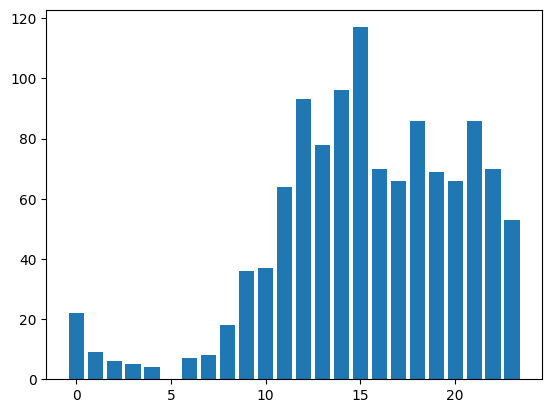

In [154]:
df['hour'] = df['created_at'].dt.hour
plt.bar(df['hour'].value_counts().index, df['hour'].value_counts().values)

<BarContainer object of 7 artists>

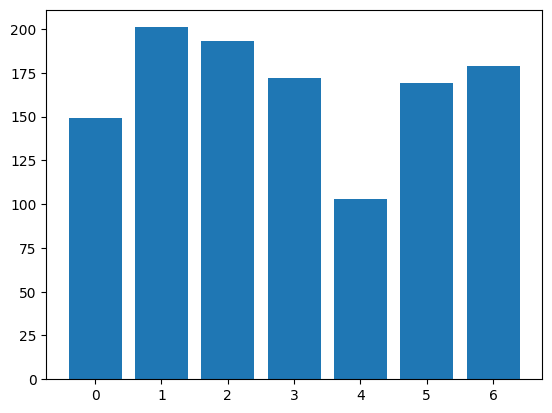

In [155]:
df['day'] = df['created_at'].dt.dayofweek
#The day of the week with Monday=0, Sunday=6.

plt.bar(df['day'].value_counts().index, df['day'].value_counts().values)

<BarContainer object of 31 artists>

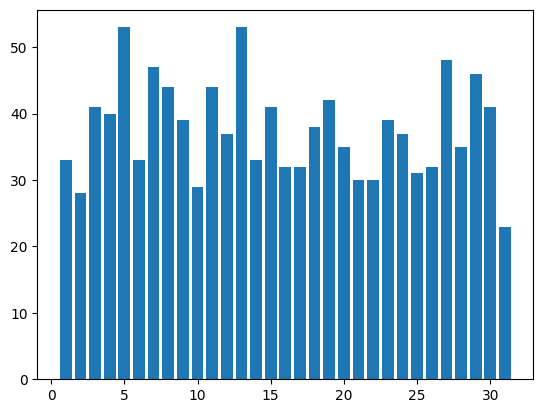

In [156]:
df['day_of_month'] = df['created_at'].dt.day
plt.bar(df['day_of_month'].value_counts().index, df['day_of_month'].value_counts().values)

In [182]:
from plotly import express as px

fig = px.scatter_mapbox(df, lat='destination_lat', lon='destination_lng', color=df['hour'])

fig.update_layout(mapbox_style="carto-positron")

fig.show()

# Train Model

In [158]:
from sklearn.neighbors import KNeighborsRegressor

In [159]:
lat_model = KNeighborsRegressor(n_neighbors=3)
long_model = KNeighborsRegressor(n_neighbors=3)

In [160]:
features = ['origin_lat', 'origin_lng','hour']

lat_model.fit(df[features], df['destination_lat'])
long_model.fit(df[features], df['destination_lng'])

KNeighborsRegressor(n_neighbors=3)

In [161]:
query = {
    'origin_lat': 35.701676,
    'origin_lng': 51.391164,
    'hour': 12,
}

query = pd.DataFrame([query])

answer = pd.DataFrame()
answer['destination_lat'] = lat_model.predict(query)
answer['destination_lng'] = long_model.predict(query)
answer

,destination_lat,destination_lng
0,35.742002,51.304526


In [162]:
from plotly import express as px

In [163]:
fig = px.scatter_mapbox(answer, lat='destination_lat', lon='destination_lng')
fig.update_layout(mapbox_style='open-street-map')